In [2]:
import sys
import os
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")

from analysis_helpers import poisson_waiting_function, \
                            run_multiple_trajectories, \
                            plot_aip_vs_t, get_active_infection_cols, get_pop_size,\
                            plot_cip_vs_t, \
                            run_sensitivity_sims, \
                            extract_cips, \
                            load_sim_dir

from stochastic_simulation import StochasticSimulation
from sir_stochastic_sim import SIRStochasticSimulation
from subdivide_severity import subdivide_severity

In [3]:
sim_dfs = load_sim_dir('/nfs01/covid_sims//1591397266-daily_outside_infection_p/Fall Nominal Testing (5-day frequency)/')

done loading daily_outside_infection_p-1e-07
done loading daily_outside_infection_p-5e-07
done loading daily_outside_infection_p-1e-06
done loading daily_outside_infection_p-5e-06
done loading daily_outside_infection_p-1e-05
done loading daily_outside_infection_p-5e-05
done loading daily_outside_infection_p-0.0001
done loading daily_outside_infection_p-0.0005
done loading daily_outside_infection_p-0.001
done loading daily_outside_infection_p-0.005
done loading daily_outside_infection_p-0.01
done loading daily_outside_infection_p-0.05


In [4]:
from params import ParamConfig

base_params = ParamConfig.load_config('fall', True, 'nominal')
params = base_params.copy()

In [5]:
cumulative_cols = ['QI','R'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
recovered_cols = ['R']
active_cols = ['QI'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
free_infectious = ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]

In [6]:
high = sim_dfs['daily_outside_infection_p-0.0005']

middle = sim_dfs['daily_outside_infection_p-0.0001']

low = sim_dfs['daily_outside_infection_p-5e-05']

In [26]:
highhigh = sim_dfs['daily_outside_infection_p-0.005']


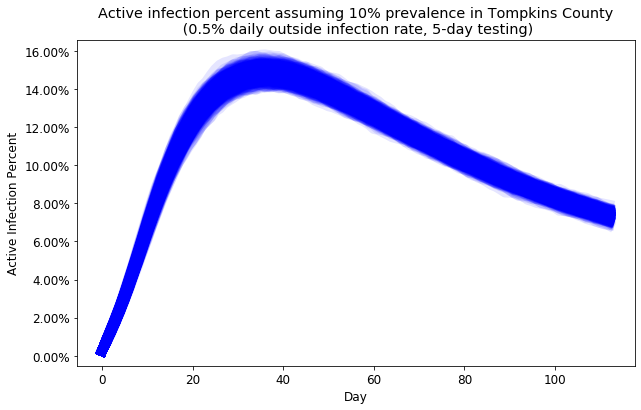

In [27]:
dfs=highhigh

fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
aip_cols = list(get_active_infection_cols(dfs[0]))
pop_size = get_pop_size(high[0])
for df in dfs:
    aip = df[aip_cols].sum(axis=1) / pop_size
    ax.plot(aip, linewidth=10, alpha=0.1, color='blue')
ax.set_xlabel('Day')
ax.set_ylabel('Active Infection Percent')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax.set_title('Active infection percent assuming 10% prevalence in Tompkins County\n (0.5% daily outside infection rate, 5-day testing)')
plt.show()

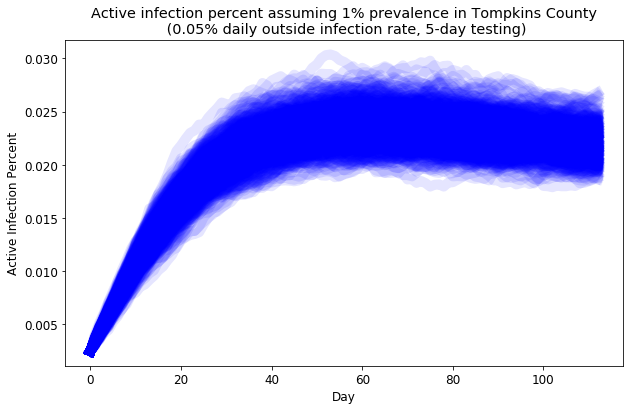

In [69]:
plot_aip_vs_t(high, title='Active infection percent assuming 1% prevalence in Tompkins County\n (0.05% daily outside infection rate, 5-day testing)')


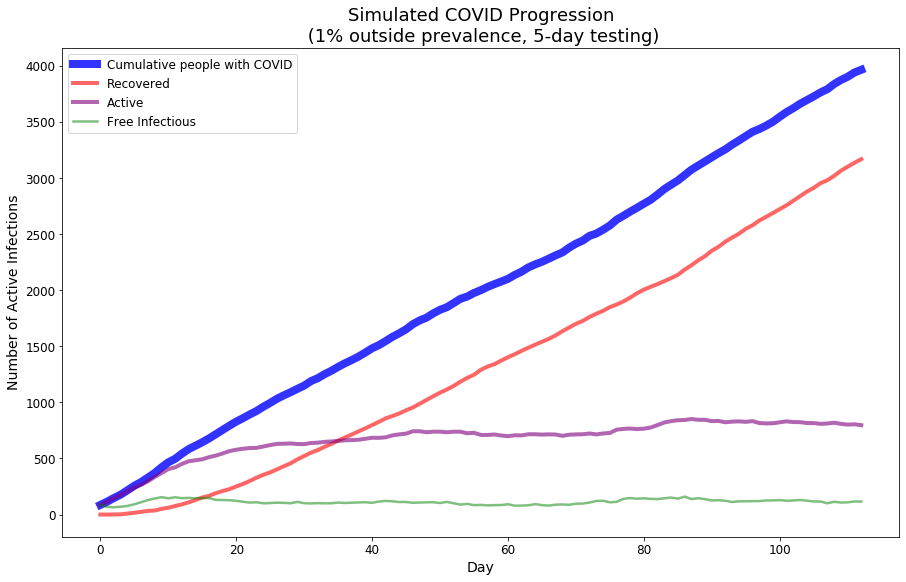

In [11]:
plt.figure(figsize=(15,9))
sample_high = high[0]

plt.plot(sample_high[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
plt.plot(sample_high[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
plt.plot(sample_high[active_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='purple')
plt.plot(sample_high[free_infectious].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
plt.xlabel("Day", size=14)
plt.ylabel("Number of Active Infections", size=14)
plt.title('Simulated COVID Progression\n (1% outside prevalence, 5-day testing)', size=18)
plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
#sample_high

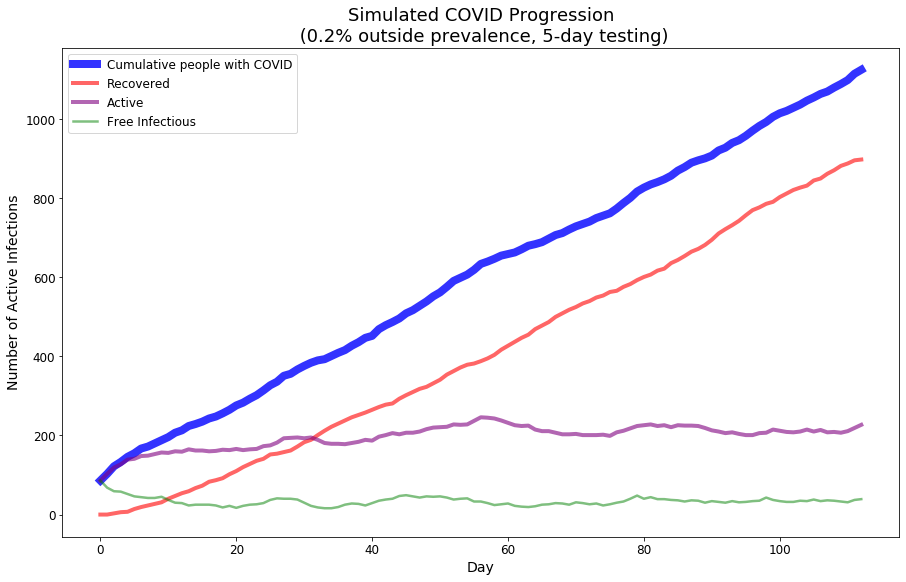

In [25]:
plt.figure(figsize=(15,9))
df_1 = sim_dfs['daily_outside_infection_p-0.0001'][0]

plt.plot(df_1[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
plt.plot(df_1[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
plt.plot(df_1[active_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='purple')
plt.plot(df_1[free_infectious].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
plt.xlabel("Day", size=14)
plt.ylabel("Number of Active Infections", size=14)
plt.title('Simulated COVID Progression\n (0.2% outside prevalence, 5-day testing)', size=18)
plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
#df_1


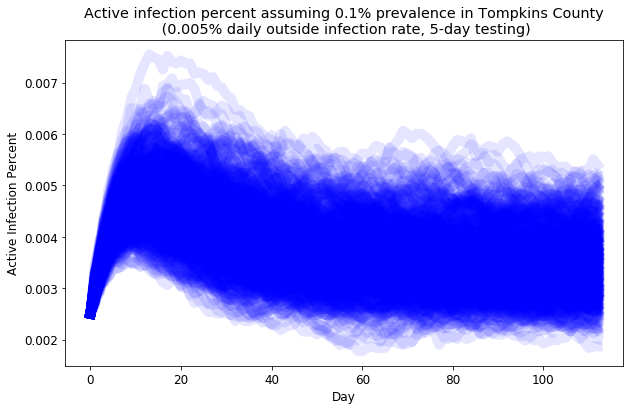

In [21]:
plot_aip_vs_t(low, title='Active infection percent assuming 0.1% prevalence in Tompkins County\n (0.005% daily outside infection rate, 5-day testing)')


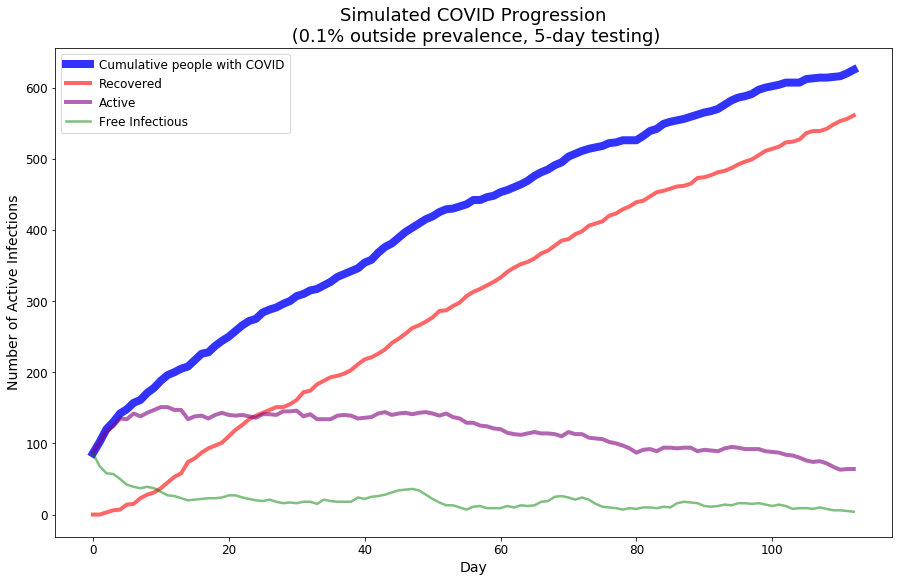

In [26]:
plt.figure(figsize=(15,9))
df_low = low[0]

plt.plot(df_low[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
plt.plot(df_low[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
plt.plot(df_low[active_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='purple')
plt.plot(df_low[free_infectious].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
plt.xlabel("Day", size=14)
plt.ylabel("Number of Active Infections", size=14)
plt.title('Simulated COVID Progression\n (0.1% outside prevalence, 5-day testing)', size=18)
plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
#df_low

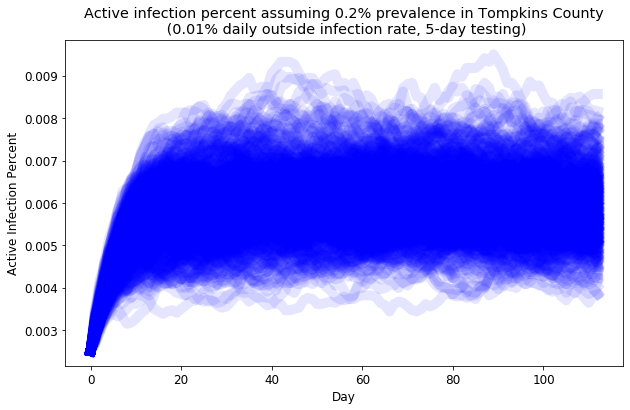

In [22]:
plot_aip_vs_t(middle, title='Active infection percent assuming 0.2% prevalence in Tompkins County\n (0.01% daily outside infection rate, 5-day testing)')
plt.ylim()

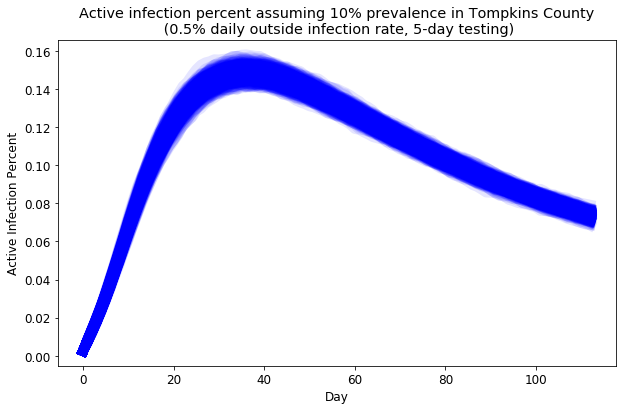

In [55]:
highhigh = sim_dfs['daily_outside_infection_p-0.005']
plot_aip_vs_t(highhigh, title='Active infection percent assuming 10% prevalence in Tompkins County\n (0.5% daily outside infection rate, 5-day testing)')



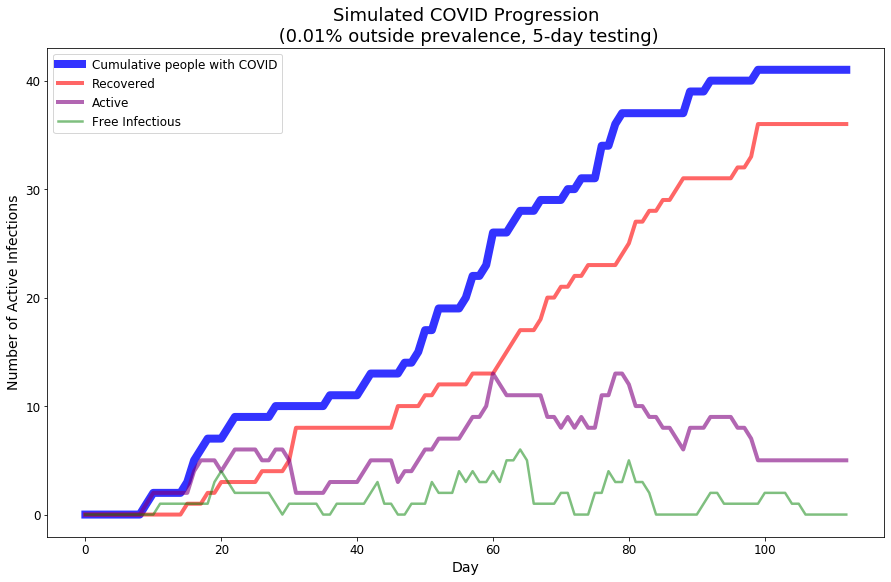

In [25]:
plt.figure(figsize=(15,9))
df_1 = sim_dfs['daily_outside_infection_p-5e-06'][2]

plt.plot(df_1[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
plt.plot(df_1[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
plt.plot(df_1[active_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='purple')
plt.plot(df_1[free_infectious].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
plt.xlabel("Day", size=14)
plt.ylabel("Number of Active Infections", size=14)
plt.title('Simulated COVID Progression\n (0.01% outside prevalence, 5-day testing)', size=18)
plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
#df_1

